In [21]:
from _04_preprocessing import housing_prepared, housing_labels
from _04_preprocessing import full_pipeline
from _04_preprocessing import start_test_set

In [25]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ["linear"], "C": [10, 100, 1000]},
    {'kernel': ["rbf"], "C": [10, 100, 1000], 'gamma': ["scale", "auto"]},
]

svm_reg = svm.SVR()

grid_search = GridSearchCV(svm_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [23]:
grid_search.fit(housing_prepared, housing_labels)

KeyboardInterrupt: 

In [6]:
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}

# SVM(Support Vector Machine)모델 이용

svm의 주요 파라미터인 **커널**, **C**와 **gamma**(커널이 rbf일 경우)를 그리드서치를 통해 튜닝하는 예시

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

In [29]:
param_distribs = {
    "kernel": ["linear", "rbf"],
    "C": reciprocal(20, 20000),
    "gamma": expon(scale=1.0)
}
rnd_search = RandomizedSearchCV(svm_reg, param_distribs,
                               n_iter=30, cv=5, scoring="neg_mean_squared_error",
                               verbose=2, random_state=42)

In [30]:
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   5.0s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   5.0s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   4.9s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=   9.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=   9.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=   9.2s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=   9.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=   9.2s
[CV] END C=58.750769152656574, gamma=0.059838768608680676,

[CV] END C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf; total time=   9.3s
[CV] END C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf; total time=   9.2s
[CV] END C=1943.5550610119265, gamma=0.37354658165762367, kernel=rbf; total time=   9.2s
[CV] END C=84.11142374014415, gamma=0.838636245624803, kernel=linear; total time=   4.8s
[CV] END C=84.11142374014415, gamma=0.838636245624803, kernel=linear; total time=   5.0s
[CV] END C=84.11142374014415, gamma=0.838636245624803, kernel=linear; total time=   5.0s
[CV] END C=84.11142374014415, gamma=0.838636245624803, kernel=linear; total time=   5.0s
[CV] END C=84.11142374014415, gamma=0.838636245624803, kernel=linear; total time=   4.9s
[CV] END C=16210.032252823165, gamma=1.4922453771381408, kernel=rbf; total time=  10.1s
[CV] END C=16210.032252823165, gamma=1.4922453771381408, kernel=rbf; total time=  10.0s
[CV] END C=16210.032252823165, gamma=1.4922453771381408, kernel=rbf; total time=  10.0s
[CV] END C=16210.0322528

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=30,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D24AC00730>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D24AC090D0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

## RandomizedSearchCV

최적의 파라미터를 찾는데 **그리드서치**말고 **랜덤서치**도 이용할 수 있음  
파라미터의 모든 값을 대입해보는 것이 아니라 확륜분포에 따라 **샘플링**한 값을 대입함  
몇 번 샘플링할지는 **n_iter**로 결정, 성능과 소요시간의 트레이드오프임  
  
각 파라미터의 확률분포를 구하기 위해 scipy의 **expon, reciprocal** 클래스를 사용했는데 솔직히 잘 모르겠음...  

In [13]:
import numpy as np
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

58974.16907380664

이전에 구했던 랜덤포레스트의 성능과 비슷해짐

In [15]:
rnd_search.best_params_

{'C': 16683.860588281546, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

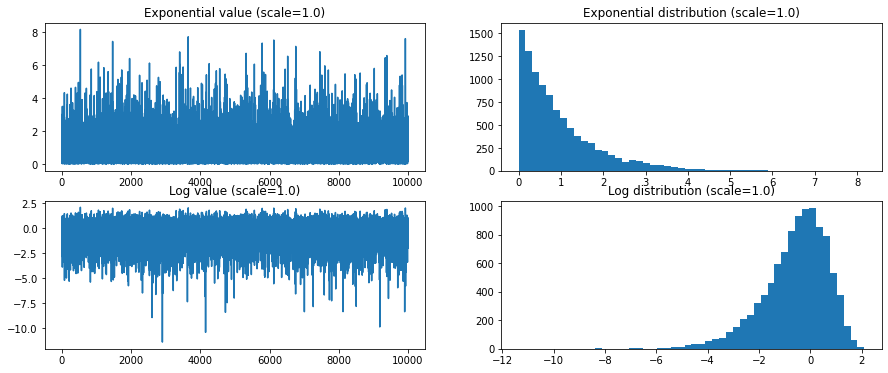

In [36]:
import matplotlib.pyplot as plt

expon_distrib = expon(scale=1.0)
samples = expon_distrib.rvs(10000, random_state=42)

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.title("Exponential value (scale=1.0)")
plt.plot(samples)

plt.subplot(222)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)

plt.subplot(223)
plt.title("Log value (scale=1.0)")
plt.plot(np.log(samples))

plt.subplot(224)
plt.title("Log distribution (scale=1.0)")
plt.hist(np.log(samples), bins=50)


plt.show()

파라미터 값으로 샘플링에 사용할 분포가 대략 우측과 같음  
즉 **원하는 스케일이 정확히 무엇인지 모르나 어느정도는 알고있을 때** 사용하면 좋다고 함  
로그분포를 보면 거의 정규분포를 따르는 것으로 보이는데 이것은  
> 원래 숫자의 분포가 평균에 대해 대칭적으로 퍼져있는 것이 아니라  
> 평균쯤에서 급격히 상승한다는 뜻?

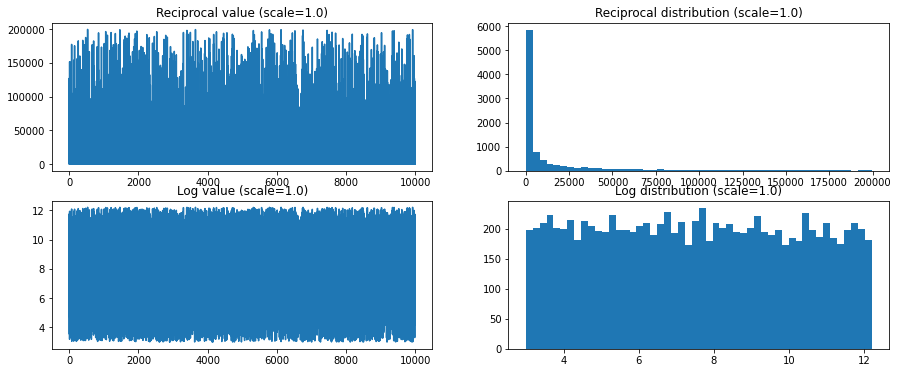

In [39]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)

plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.title("Reciprocal value (scale=1.0)")
plt.plot(samples)

plt.subplot(222)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)

plt.subplot(223)
plt.title("Log value (scale=1.0)")
plt.plot(np.log(samples))

plt.subplot(224)
plt.title("Log distribution (scale=1.0)")
plt.hist(np.log(samples), bins=50)


plt.show()

사용할 하이퍼파라미터의 **스케일에 전혀 감을 잡을 수 없을 때** 사용함  
우측 그래프의 분포를 보면 주어진 범위안에서 모든 값이 균등한 확률로 샘플링됨  
이 경우는 로그분포가 균등분포와 같은데 이것은  
> 분포도의 최소, 최대값이 있을 때,  
> 거의 최솟값만 뽑히는 분포라는 뜻?  
**대체 왜 쓴다는거지?**

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k: ])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices]

## 가장 중요한 특성을 선택하는 변환기
**np.partition**은 주로 np.partition(np.array(), k-th)로 사용됨  
예를 들어  
> np.partition('', 2)는 리스트의 순서 상관없이 작은 숫자 2개를 뽑아 왼쪽으로 놓겠다  
> np.partition('', -2)는 리스트의 순서 상관없이 큰 숫자 2개를 뽑아 오른쪽으로 놓겠다
  
**np.argpartion**은 그냥 partition과 기능은 같고 출력만 index로 하는 것

In [9]:
import numpy as np

randoms = np.random.rand(housing_prepared.shape[1])
probs = randoms / np.sum(randoms)
feature_importances = probs

k=5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
print(top_k_feature_indices)
print(probs)

[ 1 10 11 13 14]
[0.06470154 0.09054841 0.08676356 0.05760251 0.0316784  0.01574351
 0.02613785 0.07362148 0.00804777 0.04867502 0.09664422 0.10198648
 0.07766551 0.0960579  0.08919894 0.0349269 ]


각 특성에 대한 중요도는 어떻게든 구했다고 가정  
  
>랜덤포레스트의 경우 **TopFeatureSelector**의 fit()메서드로 직접 구할 수도 있음  
>그리드서치나 랜덤서치로 구할 수도 있음

In [10]:
from _06_model_tuning import attribs

top_k_feature = np.array(attribs)[top_k_feature_indices]
print(top_k_feature)

['latitude' 'bedrooms_per_room' '<1H OCEAN' 'ISLAND' 'NEAR BAY']


In [12]:
from sklearn.pipeline import Pipeline

preparation_and_feature_selection_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k))
])

## 특성 선택 변환기를 추가한 파이프라인

In [15]:
from _04_preprocessing import housing

housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [16]:
housing_prepared_top_k_features[: 3]

array([[ 0.77194962,  0.15531753,  1.        ,  0.        ,  0.        ],
       [ 0.6596948 , -0.83628902,  1.        ,  0.        ,  0.        ],
       [-1.34218285,  0.4222004 ,  0.        ,  0.        ,  0.        ]])

In [17]:
housing_prepared[0:3, top_k_feature_indices]

array([[ 0.77194962,  0.15531753,  1.        ,  0.        ,  0.        ],
       [ 0.6596948 , -0.83628902,  1.        ,  0.        ,  0.        ],
       [-1.34218285,  0.4222004 ,  0.        ,  0.        ,  0.        ]])

새로 제작한 파이프라인을 통해 데이터를 변환 후 확인

In [31]:
prepared_select_and_predict_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k)),
    ("svm_reg", svm.SVR(**rnd_search.best_params_))
])

# 전처리, 특성선택, 예측 모델을 전부 합친 파이프라인
svm.SVR()에서 '** '로 인수를 받는 부분이 있는데 저것은 임의의 **키워드인자를 받는 방법**임

딕셔너리 형태로 여러 개의 {"키값": "값"} 쌍을 입력으로 주는 것임  
> 특정 키워드에 특정 값을 임의로 담고싶을 때 사용  
> - 위 예시에서는 best_params_에서 나온 **kernel= ~, C= ~** 가 들어감



In [33]:
prepared_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('tf_num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttribsAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

전처리 단계도 포함되어 있으므로 이전에 전처리한 housing_prepared가 아닌 **housing**자체가 들어감

In [34]:
some_data = housing.iloc[: 4]
some_labels = housing_labels[: 4]

some_predictions = prepared_select_and_predict_pipeline.predict(some_data)
print(some_predictions)
print(some_labels)

[200271.64805155 313056.36357154 137328.48458829  76233.6854457 ]
17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
Name: median_house_value, dtype: float64


전체 파이프라인이 잘 동작한다  
물론 성능은 많이 구리다

In [43]:
param_grid = [{
    "preparation__tf_num__imputer__strategy": ["mean", "median", "most_frequent"],
    "feature_selection__k": list(range(1, len(feature_importances)+1))
}]

grid_search_prep = GridSearchCV(prepared_select_and_predict_pipeline, param_grid, cv=5,
                               scoring="neg_mean_squared_error", verbose=2)

In [44]:
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=median; total time=   8.7s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=1, preparation__tf_num__imputer__strategy=median; total time=   8.8s
[CV] END feature_selection__k=1, preparation__tf_num__imp

[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=median; total time=   9.0s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=median; total time=   9.1s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.0s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=6, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.1s
[CV] END feature_selection__k=7, preparation__tf_num__imputer__strategy=me

[CV] END feature_selection__k=11, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.7s
[CV] END feature_selection__k=11, preparation__tf_num__imputer__strategy=most_frequent; total time=   9.7s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=mean; total time=   9.8s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=median; total time=   9.9s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=median; total time=   9.8s
[CV] END feature_selection__k=12, preparation__tf_num__imputer__strategy=median; total time=   9

KeyboardInterrupt: 

# GridSearchCV를 이용하여 위에 작성한 준비 단계의 최적 옵션을 자동으로 탐색
그리드서치 클래스에서 **파이프라인 속 파이프라인의 매개변수에 접근할 때**는 __ 로 연결
예를 들어  
> preparation__tf_num__imputer__strategy는 다음과 같음  
- preparation 
    - tf_num 
        - imputer 
            - strategy  

그리고 시간 겁나 걸림...